<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#One-or-Two-point-crossover" data-toc-modified-id="One-or-Two-point-crossover-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>One or Two point crossover</a></span></li><li><span><a href="#Fitness-proportionate-selection" data-toc-modified-id="Fitness-proportionate-selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fitness proportionate selection</a></span></li><li><span><a href="#Tournment-Selection" data-toc-modified-id="Tournment-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tournment Selection</a></span></li><li><span><a href="#Mutation" data-toc-modified-id="Mutation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mutation</a></span></li><li><span><a href="#Generational-Genetic-Algorithm" data-toc-modified-id="Generational-Genetic-Algorithm-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generational Genetic Algorithm</a></span><ul class="toc-item"><li><span><a href="#Using-Fitness-Proportionate-Selection" data-toc-modified-id="Using-Fitness-Proportionate-Selection-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Using Fitness Proportionate Selection</a></span></li><li><span><a href="#Using-Tournment-Selection" data-toc-modified-id="Using-Tournment-Selection-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Using Tournment Selection</a></span></li></ul></li><li><span><a href="#A-Mutation-Hill-Climber" data-toc-modified-id="A-Mutation-Hill-Climber-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>A Mutation Hill Climber</a></span></li><li><span><a href="#Uniform-Crossover" data-toc-modified-id="Uniform-Crossover-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Uniform Crossover</a></span></li><li><span><a href="#Rank-Based-Selection" data-toc-modified-id="Rank-Based-Selection-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Rank Based Selection</a></span><ul class="toc-item"><li><span><a href="#Generational-Genetic-Algorithm-Example" data-toc-modified-id="Generational-Genetic-Algorithm-Example-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Generational Genetic Algorithm Example</a></span></li></ul></li><li><span><a href="#Steady-State-Genetic-Algorithm" data-toc-modified-id="Steady-State-Genetic-Algorithm-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Steady State Genetic Algorithm</a></span></li></ul></div>

# Genetic Algorithms Playground

In [11]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

## One or Two point crossover

In [15]:
one = '000000000001'
two = '111111101111'

def crossover(one, two, method):
    if (len(one)==len(two)) == True and method < 3:
        block = math.ceil(len(one)/(method+1))
        res = []
        count = 1
        for i in range(0, len(one), block):
            if count % 2 == 0:
                res.append(one[i:i+block])
            else:
                res.append(two[i:i+block])
            count += 1
    else:
        return print('Just one or two points crossover allowed!')
    
    return ''.join(res)
    
print(crossover(one, two, 1))

111111000001


## Fitness proportionate selection

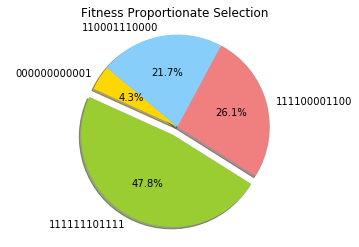

Selected parents:  ['110001110000', '000000000001']


In [16]:
tree = '111100001100'
four = '110001110000'
pop = [one, two, tree, four]

fitnesses = []
for i in pop:
    fitnesses.append(i.count('1'))
    
portions = []
for i in fitnesses:
    portions.append(i/sum(fitnesses))


colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)  # explode 1st slice
plt.pie(portions, explode=explode, labels= pop, colors=colors, autopct='%1.1f%%', 
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Fitness Proportionate Selection')
plt.show()

parents = []
for i in range(2):
    parents.append(np.random.choice(pop, p=portions))
    
print('Selected parents: ', parents)

## Tournment Selection

In [185]:
def tournment(pop, proportion_to_keep):
    '''
    If proportion_to_keep is less than 1, we input the percentage proportion of 
    the amount of individual we want to keep. If proportion is instead greater 
    than 1, we input the explicit number of individuals we want to keep. 
    '''
    if proportion_to_keep < 1:
        delete_num = len(pop)- (int(len(pop)*proportion_to_keep))
    else:
        delete_num = int(len(pop)- proportion_to_keep)
    for i in range(delete_num):
        a = pop.pop(random.randrange(len(pop)))
        b = pop.pop(random.randrange(len(pop)))
        if a.count('1') > b.count('1'):
            pop.append(a)
        else:
            pop.append(b)
    return pop
        
w= population(100, 8)
print(len(w))
q= tournment(w, 2)
len(q)

100


2

## Mutation

In [2]:
def mutations(individual):
    res = []
    for i in individual:
        if int(i) == 0:
            r = 1
        elif int(i) == 1:
            r = 0
        res.append(np.random.choice([int(i), r], p=[0.7, 0.3]))
    return ''.join([str(i) for i in res])

## Generational Genetic Algorithm

In [7]:
def fitness_proportionate_selection(pop, fitnesses):
    portions = []
    for i in fitnesses:
        portions.append(i/sum(fitnesses))

    parents = []
    for i in range(2):
        parents.append(np.random.choice(pop, p=portions))
        
    return parents

In [19]:
def population(num, length):
    pop = []
    for j in range(num):
        res = []
        for i in range(length):
            res.append(np.random.choice([0, 1], p=[0.5, 0.5]))
        pop.append(''.join([str(i) for i in res]))
    return pop

### Using Fitness Proportionate Selection

In [252]:
pop = population(100, 8)
fitness = 0
while fitness < len(pop[0]):
    newpop = []
    for i in range(len(pop)):
        fitnesses = {}
        for i in pop:
            fitnesses[i] = i.count('1')
        fitness = max(fitnesses.values())
        value = max(fitnesses)
        parents = fitness_proportionate_selection(list(fitnesses.keys()), list(fitnesses.values()))
        offspring = crossover(parents[0], parents[1], 2)
        offspring = mutations(offspring)
        newpop.append(offspring)
    pop = newpop
print(value)

11111111


### Using Tournment Selection

In [189]:
pop = population(100, 8)
fitness = 0
while fitness < len(pop[0]):
    newpop = []
    for i in range(len(pop)):
        fitnesses = {}
        for i in pop:
            fitnesses[i] = i.count('1')
        fitness = max(fitnesses.values())
        value = max(fitnesses)
        parents = tournment(list(fitnesses.keys()), 2)
        offspring = crossover(parents[0], parents[1], 2)
        offspring = mutations(offspring)
        newpop.append(offspring)
    pop = newpop
print(value)

11111111


## A Mutation Hill Climber

In [9]:
#pop = population(1, 8)
def hill_climber(pop):
    fitness = pop[0].count('1')
    while fitness < len(pop[0]):
        res = mutations(*pop)
        fitness2 = res.count('1')
        if fitness2 > fitness:
            pop = [res]
            fitness = fitness2
    return fitness, pop

fitness, pop = hill_climber(['000000000000'])
print('Fitness:', fitness, '\nResulting Individual:', pop)

Fitness: 12 
Resulting Individual: ['111111111111']


## Uniform Crossover

In [23]:
def uniform_crossover(one, two):
    res = []
    for j in zip(one, two):
        res.append(np.random.choice([j[0], j[1]], p=[0.5, 0.5]))
    return ''.join(res)
    
print(uniform_crossover(one, two))

00101110


## Rank Based Selection

{'000000000001': 1, '110001110000': 2, '111100001100': 3, '111111101111': 4}


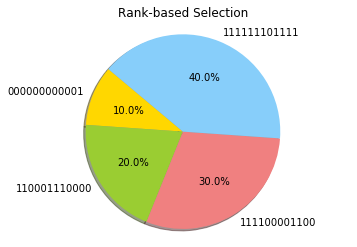

Selected Parents:  ['111100001100', '000000000001']


In [17]:
#pop = population(4, 8)
pop = [one, two, tree, four]
ranks = {}
for i in pop:
    ranks[i] = i.count('1')

a = np.sort(list(ranks.values()))
res = {}
for i in a:
    for j, z in zip(list(ranks.values()), list(ranks.keys())):
        if i==j:
            res[z] = i
            
count = 0
previous = np.inf
for i, h in zip(list(res.values()), list(res.keys())):
    if i != previous:
        count += 1
    res[h] = count
    previous = i
    
print(res)
    
proportions = [i/sum(list(res.values())) for i in list(res.values())]
            
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(proportions, labels= list(res.keys()), colors=colors, autopct='%1.1f%%', 
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Rank-based Selection')
plt.show()

parents = []
for i in range(2):
    selected = np.random.choice(pop, p=proportions)
    parents.append(selected)
    for i, j in enumerate(pop):
        if j == selected:
            pop.pop(i)
            proportions.pop(i)
            proportions = [i/sum(proportions) for i in proportions]

print('Selected Parents: ', parents)

### Generational Genetic Algorithm Example

In [21]:
def rank_selection(pop, fitnesses, number_of_parents):
    ranks = {}
    for i, j in zip(pop, fitnesses):
        ranks[i] = j

    a = np.sort(list(ranks.values()))
    res = {}
    for i in a:
        for j, z in zip(list(ranks.values()), list(ranks.keys())):
            if i==j:
                res[z] = i

    count = 0
    previous = np.inf
    for i, h in zip(list(res.values()), list(res.keys())):
        if i != previous:
            count += 1
        res[h] = count
        previous = i

    proportions = [i/sum(list(res.values())) for i in list(res.values())]

    parents = []
    for i in range(number_of_parents):
        selected = np.random.choice(pop, p=proportions)
        parents.append(selected)
        for i, j in enumerate(pop):
            if j == selected:
                pop.pop(i)
                proportions.pop(i)
                proportions = [i/sum(proportions) for i in proportions]
                
    return parents

In [22]:
pop = population(100, 12)
fitness = 0
while fitness < len(pop[0]):
    newpop = []
    for i in range(len(pop)):
        fitnesses = {}
        for i in pop:
            fitnesses[i] = i.count('1')
        fitness = max(fitnesses.values())
        value = max(fitnesses)
        parents = rank_selection(list(fitnesses.keys()), list(fitnesses.values()), 10)
        offspring = crossover(parents[0], parents[1], 2)
        offspring = mutations(offspring)
        newpop.append(offspring)
    pop = newpop
print(value)

111111111111


## Steady State Genetic Algorithm

In [23]:
pop = population(100, 12)
fitness = 0
while fitness < len(pop[0]):
    fitnesses = {}
    for i in pop:
        fitnesses[i] = i.count('1')
    fitness = max(fitnesses.values())
    value = max(fitnesses)
    parents = rank_selection(list(fitnesses.keys()), list(fitnesses.values()), 2)
    offspring = crossover(parents[0], parents[1], 2)
    offspring = mutations(offspring)
    for j, i in enumerate(pop):
        if i == min(fitnesses):
            pop.pop(j)
            break
    pop.append(offspring)
print(value)

111111111111
